In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [59]:
df = pd.read_csv("MorningTest.csv")[['price']]
print(len(df))

sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df))
# df_scaled = df

37000


Calculate slopes

In [60]:
ewa = df_scaled.ewm(span=10, adjust=False).mean() #20
slope = ewa.diff()
npslope = np.array(slope)
bought = False
sumwin = 0
transactions = []
for i, pt in enumerate(npslope):
    if pt > -0.001 and not bought: #0.005
        bought = df.iat[i,0]
        # print("bought", i, pt)
    if pt < 0.0005000000000000178 and bought: #-0.001
        # print("Selling",i, pt)
        transactions.append(df.iat[i,0] - bought)
        sumwin = sumwin + df.iat[i,0] - bought
        # print(df.iat[i,0] - bought)
        bought = False
print("Total winning", sumwin)

Total winning 755.6999600000045


Transactions:  26557
Average:  0.02845577286591123
Median:  0.0


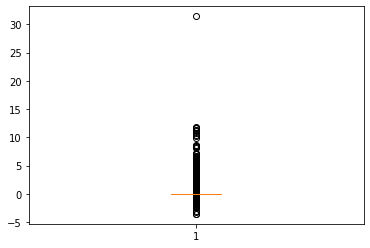

In [61]:
import statistics
import matplotlib.pyplot as plt

print("Transactions: ", len(transactions))
print("Average: ", statistics.mean(transactions))
print("Median: ", statistics.median(transactions))
plt.boxplot(transactions)
plt.show()
# transactions.sort()
# print(transactions)